In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [71]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [72]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fae00a19ac8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fae00a199e8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fae00a19b38>)

In [73]:
print(mnist.train.images.shape)
print(mnist.test.images.shape)
print(mnist.validation.images.shape)

print(mnist.train.labels.shape)
print(mnist.test.labels.shape)
print(mnist.validation.labels.shape)
mnist.train.labels[0]

(55000, 784)
(10000, 784)
(5000, 784)
(55000, 10)
(10000, 10)
(5000, 10)


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

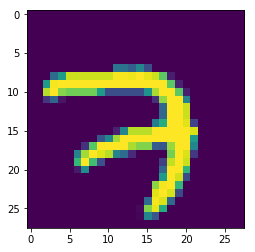

In [74]:
first_image = mnist.train.images[0]
first_image = first_image.reshape(28,28)
plt.imshow(first_image)

In [0]:
n_input = 784
n_hidden1 = 256
n_hidden2 = 256
n_output = 10

In [0]:
weights = {
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out' : tf.Variable(tf.random_normal([n_hidden2,n_output]))
}
biases = {
    'h1' : tf.Variable(tf.random_normal([n_hidden1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden2])),
    'out' : tf.Variable(tf.random_normal([n_output]))
}

In [77]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(1, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(1, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(1, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(1, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(1, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(1, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_12:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_13:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_14:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_

In [0]:
def forward_propogation(x,weights,biases):
  input_hidden_layer1 = tf.add(tf.matmul(x,weights['h1']), biases['h1'])
  output_hidden_layer1 = tf.nn.relu(input_hidden_layer1)
  
  input_hidden_layer2 = tf.add(tf.matmul(output_hidden_layer1,weights['h2']), biases['h2'])
  output_hidden_layer2 = tf.nn.relu(input_hidden_layer2)
  
  # no activation function
  output_layer = tf.add(tf.matmul(output_hidden_layer2,weights['out']), biases['out'])
  return output_layer

In [0]:
x = tf.placeholder(tf.float32,[None, 784])
y = tf.placeholder(tf.int32,[None,n_output])
pred = forward_propogation(x,weights,biases)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#c,_ = sess.run([cost,optimize],feed_dict={
#    x : mnist.train.images,
#    y : mnist.train.labels
#})
#c

In [82]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

27962.37730050087
5020.067149013281
2767.848631912616
1838.6677882042313
1434.835687103466
1221.8518981175075
1110.1909946587266
1047.1746913436118
918.0540420554977
797.3623702609887
704.285311672934
691.0475798965773
647.433457331116
537.2660891914653
550.1797334494906
433.02691010394625
364.6700727208482
340.86014409160174
324.75807123446367
372.75156698095134
250.88705710882388
222.2690925970602
255.4157117149737
194.4759010232063
203.1038481312852


In [83]:
predictions = tf.argmax(pred,1)
actual = tf.argmax(y,1)

score = tf.equal(predictions,actual)

predictions,score = sess.run([predictions,score],feed_dict = {
    x : mnist.test.images,
    y : mnist.test.labels
})
predictions,actual,score.sum()

(array([7, 2, 1, ..., 4, 5, 6]),
 <tf.Tensor 'ArgMax_21:0' shape=(?,) dtype=int64>,
 9579)